In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Churn = pd.read_csv("https://raw.githubusercontent.com/Ayushi0214/Customer-Churn-analysis/refs/heads/main/Customer%20Churn.csv")
Churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Change the Data types of column name-> TotalCharges.....becoz blank value.  

## Replacing blank with 0 as tenure is 0 and no of TotalCharges are recoreded

In [4]:
Churn['TotalCharges'] = Churn['TotalCharges'].replace(" ", "0")
Churn['TotalCharges'] = Churn['TotalCharges'].astype("float")

In [5]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
Churn.isnull().mean()*100

,0
customerID,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0


In [6]:
Churn.isnull().sum().sum()

np.int64(0)

In [ ]:
Churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
Churn.duplicated().sum()

np.int64(0)

In [8]:
Churn['customerID'].duplicated().sum()

np.int64(0)

###  Converted 0 and 1 values of SeniorCitizen to yes/No to make it easier to understand

In [9]:
def con(value):
    if value ==1:
      return "yes"
    else:
      return "NO"


Churn['SeniorCitizen'] = Churn['SeniorCitizen'].apply(con)

In [10]:
Churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NO,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NO,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NO,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NO,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NO,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


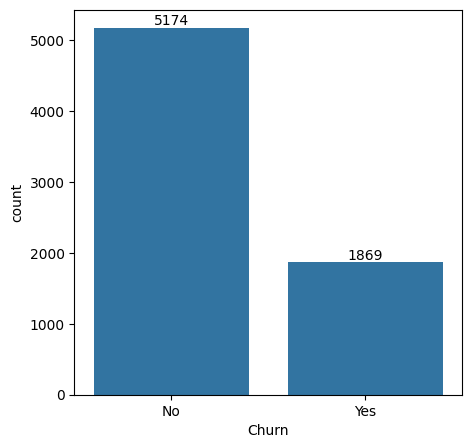

In [11]:
plt.figure(figsize =(5,5))
ax = sns.countplot(x=Churn['Churn'])
ax.bar_label(ax.containers[0])
plt.show()

#### from the given pie chartwe can conclude that 26.54% of our customers have churned out.

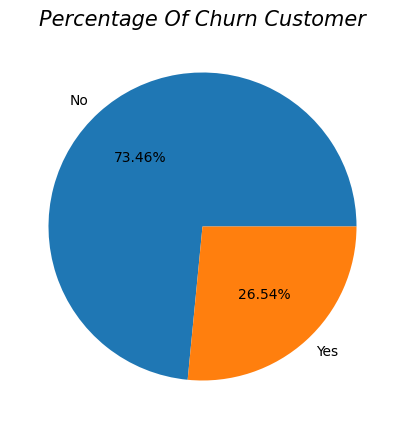

,Churn
Churn,
No,5174
Yes,1869


In [12]:
plt.figure(figsize =(5,5))
gb = Churn.groupby("Churn").agg({"Churn": "count"})
plt.pie(gb['Churn'], labels= gb.index, autopct= "%1.2f%%")
plt.title('Percentage Of Churn Customer', fontsize = 15, style = 'italic')
plt.show()
gb

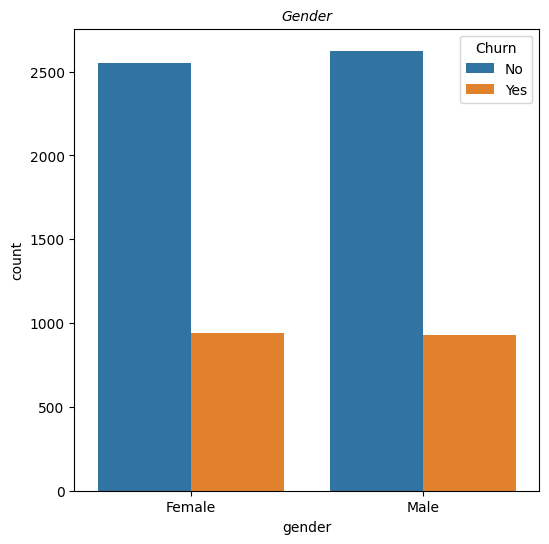

In [13]:
plt.figure(figsize =(6,6))
sns.countplot(x='gender', data = Churn,  hue= 'Churn')
plt.title("Gender", fontsize = 10, style = 'italic')
plt.show()

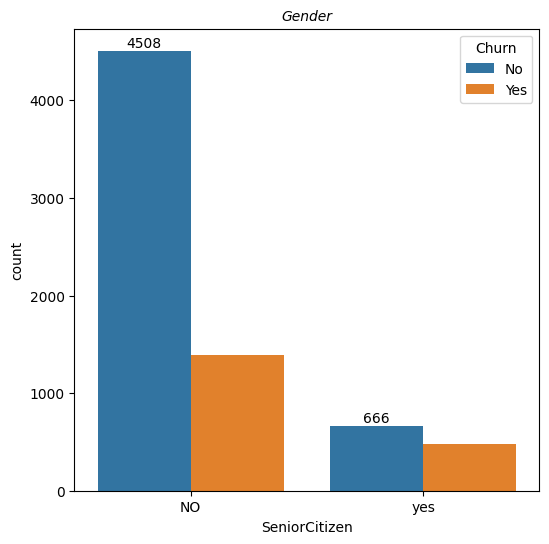

In [14]:
plt.figure(figsize =(6,6))
ax =sns.countplot(x='SeniorCitizen', data = Churn,  hue= 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Gender", fontsize = 10, style = 'italic')
plt.show()

###### Comaparative a greater percentage of people in senior citizen category have churned

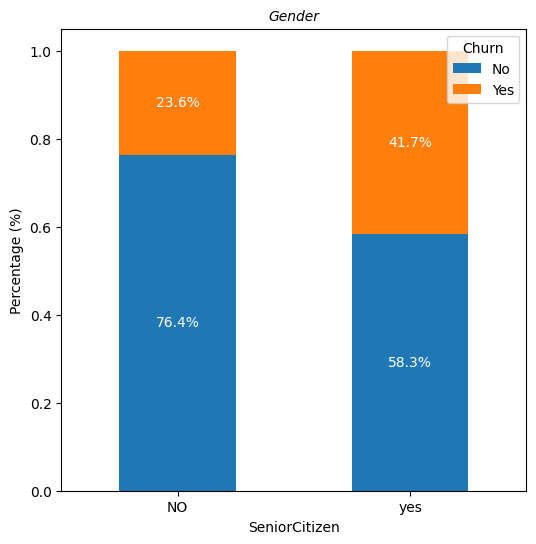

In [15]:
total_counts = Churn.groupby('SeniorCitizen')['Churn'].value_counts(normalize = True).unstack()
fig, ax =plt.subplots(figsize =(6,6))
total_counts.plot(kind = 'bar', stacked = True, ax =ax)
for p in ax.patches:
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy()
  ax.text(x + width / 2, y + height / 2, f'{height * 100:.1f}%',
            ha='center',va = 'center', fontsize=10, color='white')
plt.title("Gender", fontsize = 10, style = 'italic')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation = 0)
plt.legend(title = 'Churn', loc ='upper right')   ### bbox_to_anchor = (0.9,0.9)
plt.show()

##### People who have used our services for a long time gave stayed and people who have used our services  1 or 2 months.

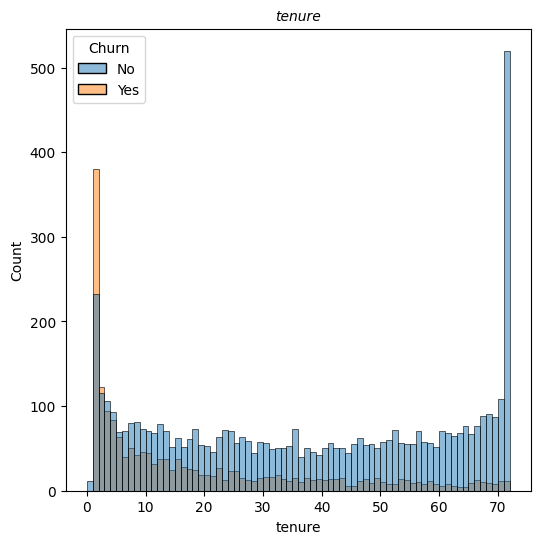

In [16]:
plt.figure(figsize =(6,6))
sns.histplot(x='tenure', data=Churn, bins=72, hue ='Churn')
plt.title("tenure", fontsize = 10, style = 'italic')
plt.show()

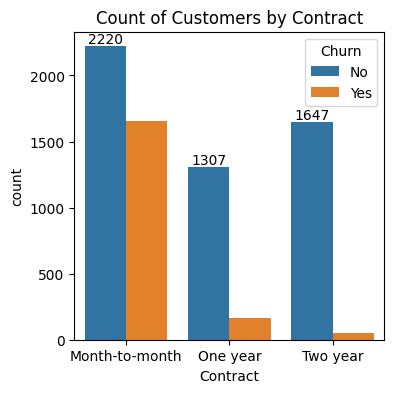

In [19]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = Churn, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

In [21]:
Churn.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

##### The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

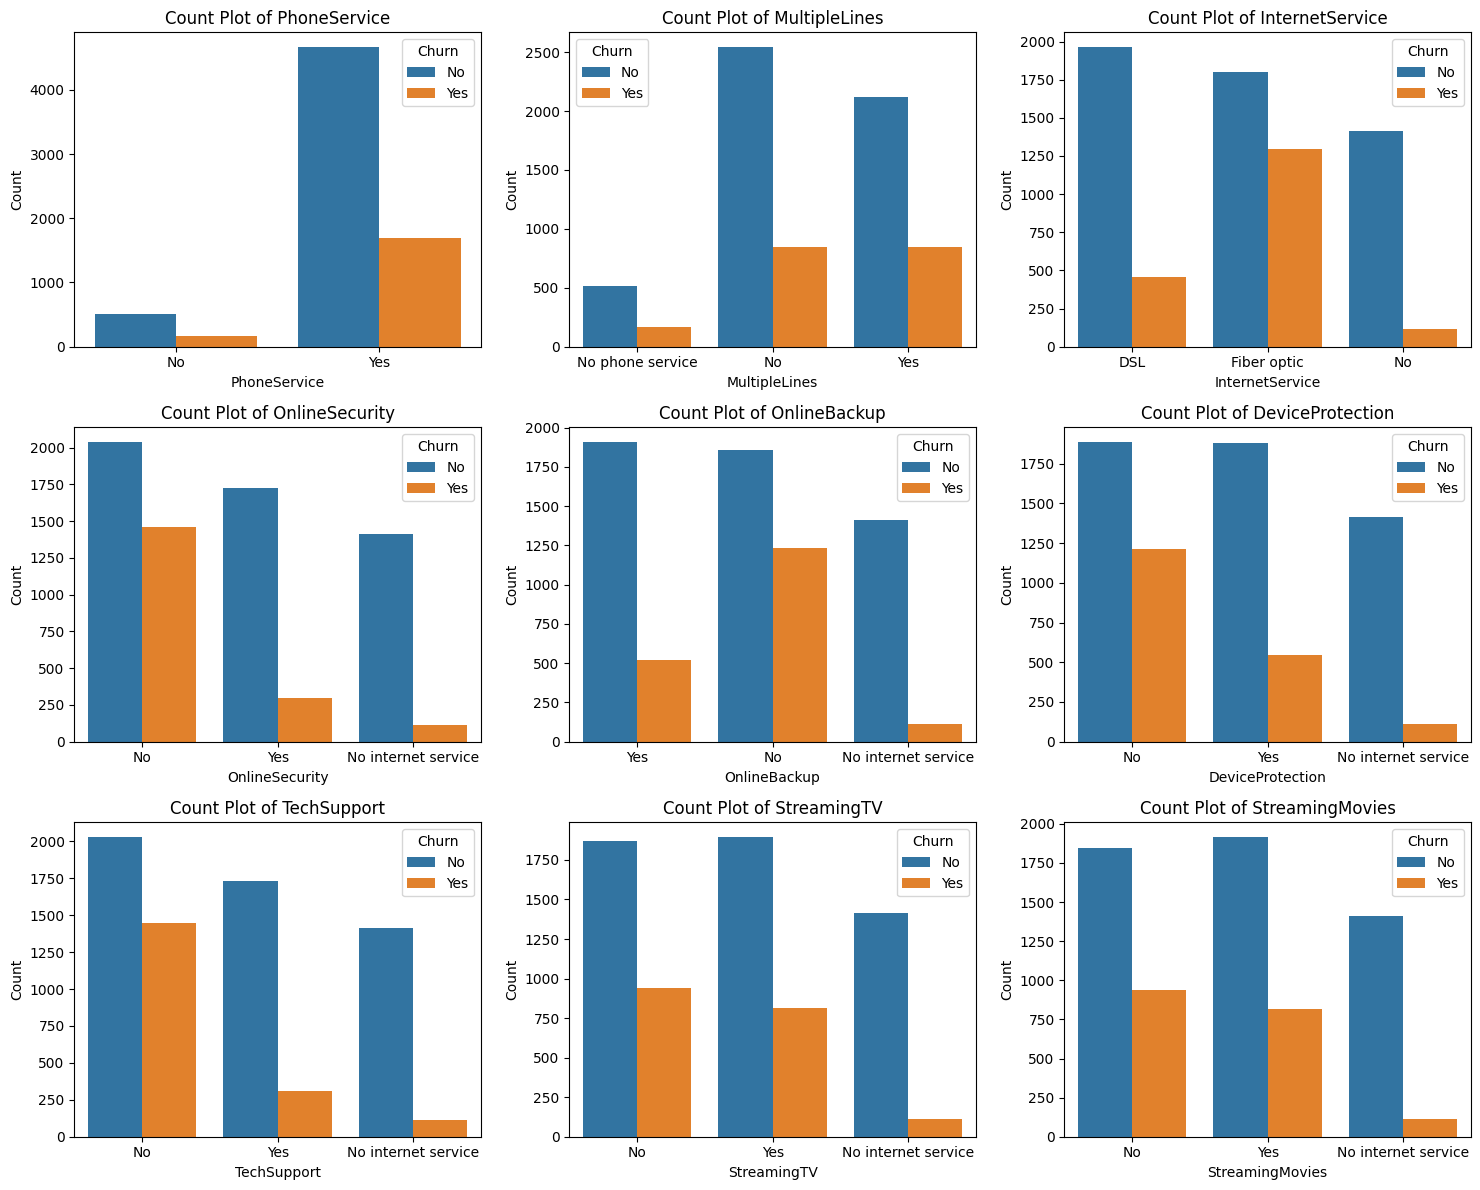

In [23]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=Churn, ax=axes[i], hue = Churn["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### Customer is likely to churn when he using electric check as a payment method

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

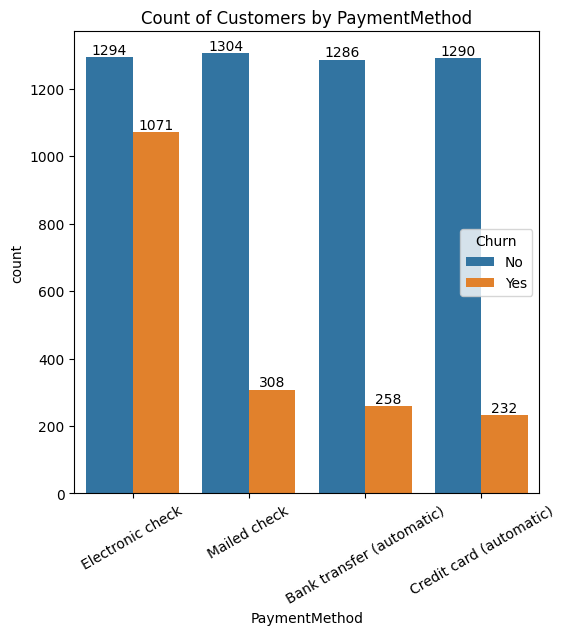

In [28]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x = "PaymentMethod", data = Churn, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by PaymentMethod")
plt.xticks(rotation = 30)
plt